In [2]:
import pandas as pd 

taiwan_real_estate = pd.read_csv("/kaggle/input/taiwan-real-estate-prices-and-features-dataset/realestate.csv")
taiwan_real_estate.head()


,No,TransactionDate,HouseAge,DistanceToMRT,NumberConvenienceStores,Latitude,Longitude,PriceOfUnitArea
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Intro to Linear Regression and Variables

### Visualizing two numeric variables
Before you can run any statistical models, it's usually a good idea to visualize your dataset. Here, you'll look at the relationship between house price per area and the number of nearby convenience stores using the Taiwan real estate dataset.

One challenge in this dataset is that the number of convenience stores contains integer data, causing points to overlap. To solve this, you will make the points transparent.

taiwan_real_estate is available as a pandas DataFrame.

* Import the seaborn package, aliased as sns.
* Using taiwan_real_estate, draw a scatter plot of "price_twd_msq" (y-axis) versus "n_convenience" (x-axis).
* Draw a trend line calculated using linear regression. Omit the confidence interval ribbon. Note: The scatter_kws argument, pre-filled in the exercise, makes the data points 50% transparent.

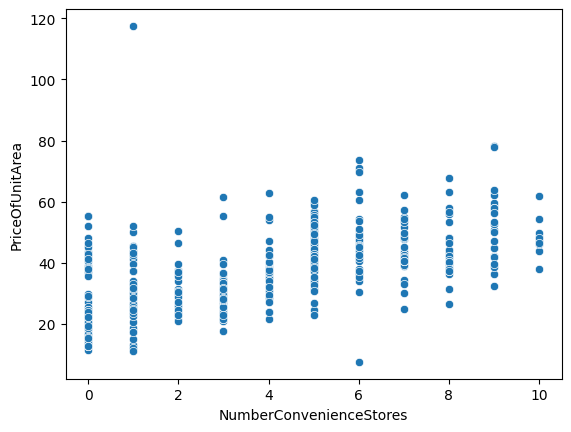

In [3]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(y="PriceOfUnitArea", x="NumberConvenienceStores", data =taiwan_real_estate)

# Show the plot
plt.show()

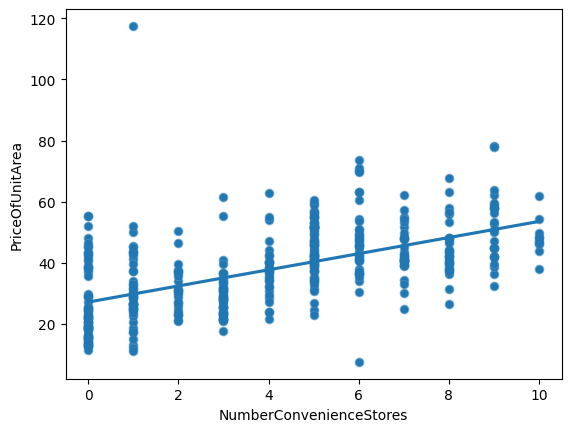

In [4]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(y="PriceOfUnitArea", x="NumberConvenienceStores",
                data=taiwan_real_estate)

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x="NumberConvenienceStores",
         y="PriceOfUnitArea",
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

Scatter plots are the standard way to visualize the relationship between two numeric variables, and seaborn makes adding linear trend lines easy.

### Linear regression with ols()
While sns.regplot() can display a linear regression trend line, it doesn't give you access to the intercept and slope as variables, or allow you to work with the model results as variables. That means that sometimes you'll need to run a linear regression yourself.

Time to run your first model!

taiwan_real_estate is available. TWD is an abbreviation for Taiwan dollars.




* Import the ols() function from the statsmodels.formula.api package.
* Run a linear regression with price_twd_msq as the response variable, n_convenience as the explanatory variable, and taiwan_real_estate as the dataset. Name it mdl_price_vs_conv.
* Fit the model.
* Print the parameters of the fitted model.

In [5]:
# Import the ols function
from statsmodels.formula.api import ols


# Create the model object
mdl_price_vs_conv = ols("PriceOfUnitArea ~ NumberConvenienceStores", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept                  27.181105
NumberConvenienceStores     2.637653
dtype: float64


### The model had an Intercept coefficient of 27.181105. What does this mean?


**On average, a house with zero convenience stores nearby had a price of 27.181105 TWD per square meter.**

### The model had an n_convenience coefficient of 2.637653. What does this mean?



**If you increase the number of nearby convenience stores by one, then the expected increase in house price is 2.637653 TWD per square meter.**

 The intercept is positive, so a house with no convenience stores nearby still has a positive price. The coefficient for convenience stores is also positive, so as the number of nearby convenience stores increases, so does the price of the house

### Visualizing numeric vs. categorical
If the explanatory variable is categorical, the scatter plot that you used before to visualize the data doesn't make sense. Instead, a good option is to draw a histogram for each category.

The Taiwan real estate dataset has a categorical variable in the form of the age of each house. The ages have been split into 3 groups: 0 to 15 years, 15 to 30 years, and 30 to 45 years.


* Using taiwan_real_estate, plot a histogram of price_twd_msq with 10 bins. Split the plot by house_age_years to give 3 panels.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1057: FutureWarning: The default o

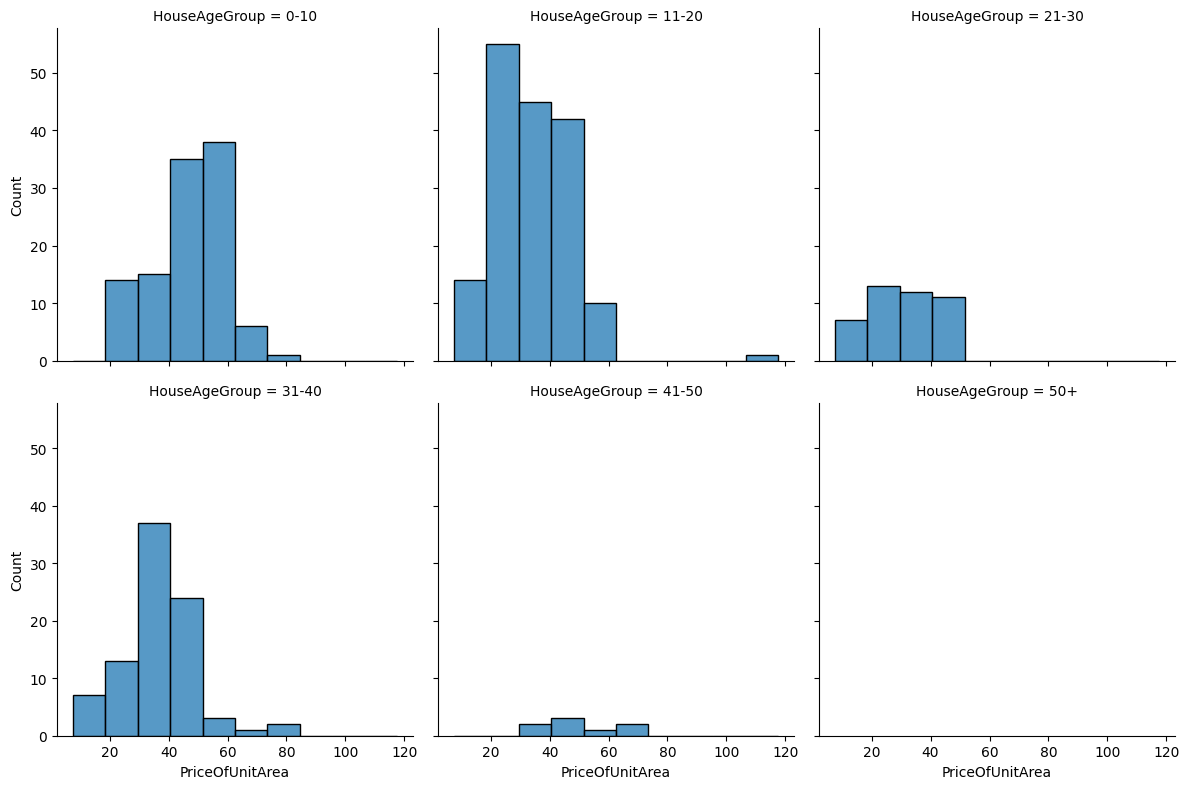

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Bin house ages into categories
bins = [0, 10, 20, 30, 40, 50, 100]  # adjust as needed
labels = ["0-10", "11-20", "21-30", "31-40", "41-50", "50+"]

taiwan_real_estate["HouseAgeGroup"] = pd.cut(
    taiwan_real_estate["HouseAge"], bins=bins, labels=labels, right=False
)

# Plot with fewer facets
sns.displot(
    data=taiwan_real_estate,
    x="PriceOfUnitArea",
    col="HouseAgeGroup",
    bins=10,
    col_wrap=3,   # wrap plots into rows
    height=4
)

plt.show()


It appears that new houses are the most expensive on average, and the medium aged ones (15 to 30 years) are the cheapest

###  Calculating means by category
A good way to explore categorical variables further is to calculate summary statistics for each category. For example, you can calculate the mean and median of your response variable, grouped by a categorical variable. As such, you can compare each category in more detail.

Here, you'll look at grouped means for the house prices in the Taiwan real estate dataset. This will help you understand the output of a linear regression with a categorical variable.


* Group taiwan_real_estate by house_age_years and calculate the mean price (price_twd_msq) for each age group. Assign the result to mean_price_by_age.
* Print the result and inspect the output.

In [7]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby("HouseAgeGroup")["PriceOfUnitArea"].mean()

# Print the result
print(mean_price_by_age)

HouseAgeGroup
0-10     46.636697
11-20    34.222754
21-30    31.348837
31-40    36.633333
41-50    48.762500
50+            NaN
Name: PriceOfUnitArea, dtype: float64


/tmp/ipykernel_36/1307033665.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price_by_age = taiwan_real_estate.groupby("HouseAgeGroup")["PriceOfUnitArea"].mean()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


# Linear regression with a categorical explanatory variable
Great job calculating those grouped means! As mentioned in the last video, the means of each category will also be the coefficients of a linear regression model with one categorical variable. You'll prove that in this exercise.

To run a linear regression model with categorical explanatory variables, you can use the same code as with numeric explanatory variables. The coefficients returned by the model are different, however. Here you'll run a linear regression on the Taiwan real estate dataset.


* Run and fit a linear regression with price_twd_msq as the response variable, house_age_years as the explanatory variable, and taiwan_real_estate as the dataset. Assign to mdl_price_vs_age.
* Print its parameters.

In [8]:
# Create the model, fit it
mdl_price_vs_age = ols("PriceOfUnitArea ~ HouseAgeGroup", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                 46.636697
HouseAgeGroup[T.11-20]   -12.413943
HouseAgeGroup[T.21-30]   -15.287860
HouseAgeGroup[T.31-40]   -10.003364
HouseAgeGroup[T.41-50]     2.125803
HouseAgeGroup[T.50+]       0.000000
dtype: float64


* Update the model formula so that no intercept is included in the model. Assign to mdl_price_vs_age0.
* Print its parameters.



In [9]:
# Create the model, fit it
mdl_price_vs_age0 = ols("PriceOfUnitArea ~ HouseAgeGroup + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

HouseAgeGroup[0-10]     46.636697
HouseAgeGroup[11-20]    34.222754
HouseAgeGroup[21-30]    31.348837
HouseAgeGroup[31-40]    36.633333
HouseAgeGroup[41-50]    48.762500
HouseAgeGroup[50+]       0.000000
dtype: float64


Classy categorical linear regression! The coefficients of the model are just the means of each category you calculated previously. Fantastic job!